# How to use a time-weighted vector store retriever

The Time-Weighted Vector Store Retriever combines semantic similarity (how relevant the document is to the query) with time decay (a mechanism that prioritizes recent or frequently accessed documents)

# Algorithm Overview
The score for each document is calculated as:

* semantic_similarity + (1.0 - decay_rate) ^ hours_passed

* semantic_similarity: Measures how well the document matches the query based on embeddings.
* hours_passed: Time since the document was last accessed.
* decay_rate: Determines how quickly a document's relevance decays over time.


# Key Features
1. Recency Preference: Documents accessed recently have higher scores because hours_passed is small.

2. Control via decay_rate:

* Low decay_rate: Memories fade slowly, emphasizing older documents.
* High decay_rate: Memories fade quickly, emphasizing recent documents.
3. Access Updates: When a document is retrieved, its last accessed time is updated, making it "fresh" again.

4. Virtual Time: You can mock time (useful for simulations or testing) to see how the retriever behaves as time progresses.

# Step-by-Step Explanation
1. Low Decay Rate Example

In [5]:
pip install faiss-cpu


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: faiss-cpu in c:\users\admin\desktop\10-20-2024\venv\lib\site-packages (1.9.0.post1)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# Import necessary libraries
from datetime import datetime, timedelta  # For handling dates and times
import faiss  # For creating and managing the FAISS vector index
from langchain.retrievers import TimeWeightedVectorStoreRetriever  # For time-weighted retrieval
from langchain_community.docstore import InMemoryDocstore  # In-memory document storage
from langchain_community.vectorstores import FAISS  # Wrapper for FAISS vector store
from langchain_core.documents import Document  # For creating document objects
from langchain_openai import OpenAIEmbeddings  # OpenAI embedding model for vectorization

# Define embedding model
# OpenAIEmbeddings is used to generate embeddings for text data
embeddings_model = OpenAIEmbeddings()

# Initialize FAISS vector store
embedding_size = 1536  # The dimensionality of the embedding vector (1536 for OpenAI models like text-embedding-ada-002)
index = faiss.IndexFlatL2(embedding_size)  # FAISS index for vector similarity search using L2 (Euclidean) distance
vectorstore = FAISS(embeddings_model, index, InMemoryDocstore({}), {})  # Wrap the FAISS index with InMemoryDocstore

# Initialize TimeWeightedVectorStoreRetriever
# Combines semantic similarity and recency-based scoring to retrieve documents
retriever = TimeWeightedVectorStoreRetriever(
    vectorstore=vectorstore,  # The FAISS-backed vector store
    decay_rate=0.0000000000000000000000001,  # Very low decay rate; recency has minimal effect
    k=1  # Retrieve the top 1 result
)

# Add documents to the retriever
# A document represents a piece of text with metadata
yesterday = datetime.now() - timedelta(days=1)  # Timestamp for "yesterday"
retriever.add_documents([
    Document(page_content="hello world", metadata={"last_accessed_at": yesterday})  # Add document with metadata
])
retriever.add_documents([
    Document(page_content="hello foo")  # Add another document without specific metadata
])

# Query the retriever
# The retriever uses the query text "hello world" to find the most relevant document(s)
result = retriever.invoke("hello world")

# Print the result
# Displays the most relevant document along with its metadata
print(result)


[Document(metadata={'last_accessed_at': datetime.datetime(2024, 11, 28, 20, 4, 34, 225310), 'created_at': datetime.datetime(2024, 11, 28, 20, 4, 30, 212510), 'buffer_idx': 0}, page_content='hello world')]


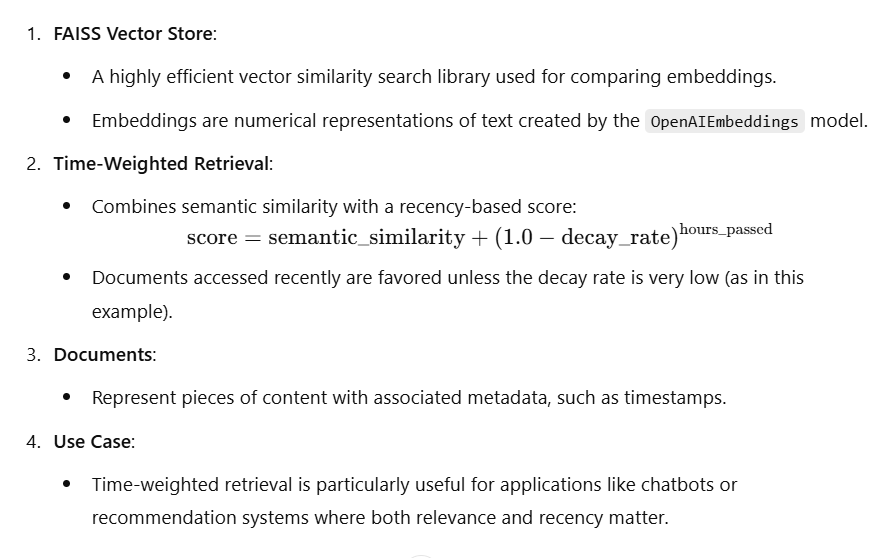